# Analisis de Microcreditos otorgados en Argentina 2020.
Dataset descargado de [Datos argentina](https://datos.gob.ar) sobre los microcreditos otorgados en Argentina el 2020. La idea fue hacer un buen analisis exploratorio, sacando todo el provecho y potencial de las librerias Pandas, Numpy y matplotlib junto con seaborn y plotly. 

Finalmente se termina el trabajo con una clustering para ver que montos y cantidad de creditos otorgados son mas semejantes dependiendo de la provincia y region. 
Se utilizo apoyo de la biblia de practica en español en lo que Data Science se refiere llamada [Ciencia de Datos](https://www.cienciadedatos.net).

Para añadir, si bien el analisis realizado cuenta con una serie de explicaciones, la idea fue mostrar el potencial del codigo utilizado sin hacer mucho enfasis en explicar cada cosa. Sin embargo, se hace una conclusion final pero hay que tener en cuenta que la idea de este trabajo era una practica de codigo, por lo que le recomiento al lector de este proyecto es que pueda sacar sus conclusiones y hasta copiar codigo o guardar las graficas. 

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import seaborn as sns
sns.set()

In [98]:
creditos = pd.DataFrame(pd.read_excel("microcreditos-20201231.xlsx"))

In [99]:
creditos

,Unnamed: 0,periodo,codigo_indec_provincia,provincia,codigo_indec_departamento,departamento,codigo_indec_localidad,localidad,microcreditos,monto_microcreditos
0,0,2001-07-01,50,Mendoza,50070,Maipú,50070060,Maipú,1,1000.00
1,1,2004-12-01,34,Formosa,34021,Laishi,34021030,Herradura,7,2100.00
2,2,2004-12-01,34,Formosa,34049,Pilcomayo,34049010,Clorinda,46,13800.00
3,3,2005-01-01,34,Formosa,34021,Laishi,34021030,Herradura,10,3000.00
4,4,2005-01-01,34,Formosa,34049,Pilcomayo,34049010,Clorinda,1,300.00
...,...,...,...,...,...,...,...,...,...,...
29725,29725,2020-12-01,14,Córdoba,14028,Cruz del Eje,14028200,Villa de Soto,19,331000.00
29726,29726,2020-12-01,14,Córdoba,14014,Capital,1401401003,Córdoba,16,409000.00
29727,29727,2020-12-01,10,Catamarca,10049,Capital,10049030,San Fernando del Valle de Catamarca,36,519000.00
29728,29728,2020-12-01,18,Corrientes,18042,Empedrado,18042020,Empedrado,12,208000.00


In [101]:
creditos.isna().sum()

Unnamed: 0                   0
periodo                      0
codigo_indec_provincia       0
provincia                    0
codigo_indec_departamento    0
departamento                 0
codigo_indec_localidad       0
localidad                    0
microcreditos                0
monto_microcreditos          0
dtype: int64

## 1 Ahora visualizamos a que provincias y cual recibio mas microcreditos en el año 2020

In [102]:
pd.DataFrame(creditos["provincia"].unique())

,0
0,Mendoza
1,Formosa
2,Misiones
3,Buenos Aires
4,Río Negro
5,Tucumán
6,Entre Ríos
7,Santa Fe
8,Salta
9,Chaco


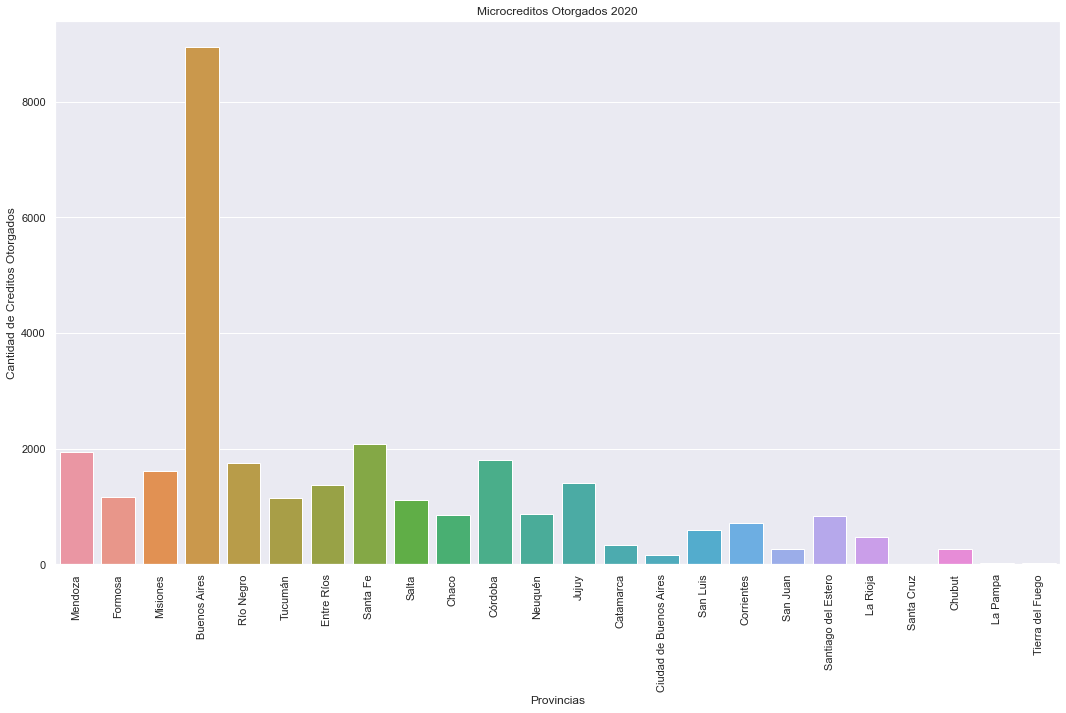

In [103]:
plt.figure(figsize=(18,10))
c = sns.countplot(x="provincia",data=creditos)
label = plt.xticks(rotation=90)
plt.xlabel("Provincias")
plt.ylabel("Cantidad de Creditos Otorgados")
plt.title("Microcreditos Otorgados 2020")
plt.show()

In [104]:
creditos["provincia"].value_counts()

Buenos Aires              8951
Santa Fe                  2074
Mendoza                   1933
Córdoba                   1805
Río Negro                 1754
Misiones                  1613
Jujuy                     1398
Entre Ríos                1373
Formosa                   1167
Tucumán                   1138
Salta                     1110
Neuquén                    868
Chaco                      855
Santiago del Estero        831
Corrientes                 710
San Luis                   587
La Rioja                   478
Catamarca                  338
San Juan                   268
Chubut                     264
Ciudad de Buenos Aires     164
Tierra del Fuego            26
La Pampa                    15
Santa Cruz                  10
Name: provincia, dtype: int64

In [105]:
# Entre los departamentos a nivel país, las ciudades capitales son las que mas creditos obtuvieron. Sin embargo, el mayor 
# volumen puede estar en CABA, ya que el top 5 de mayores cantidad de microcreditos otorgados son departamentos pertenecientes
# a Buenos Aires
creditos["departamento"].value_counts()

Capital            1618
San Fernando        488
La Plata            484
Lomas de Zamora     480
Quilmes             479
                   ... 
Pocito                1
Tres Lomas            1
Pehuajó               1
Carlos Casares        1
Trenque Lauquen       1
Name: departamento, Length: 315, dtype: int64

In [106]:
capitales = creditos[creditos["departamento"]=="Capital"]
capitales["provincia"].unique()

array(['Misiones', 'Mendoza', 'Salta', 'Tucumán', 'Catamarca', 'Córdoba',
       'Corrientes', 'San Juan', 'Santiago del Estero', 'La Rioja',
       'La Pampa'], dtype=object)

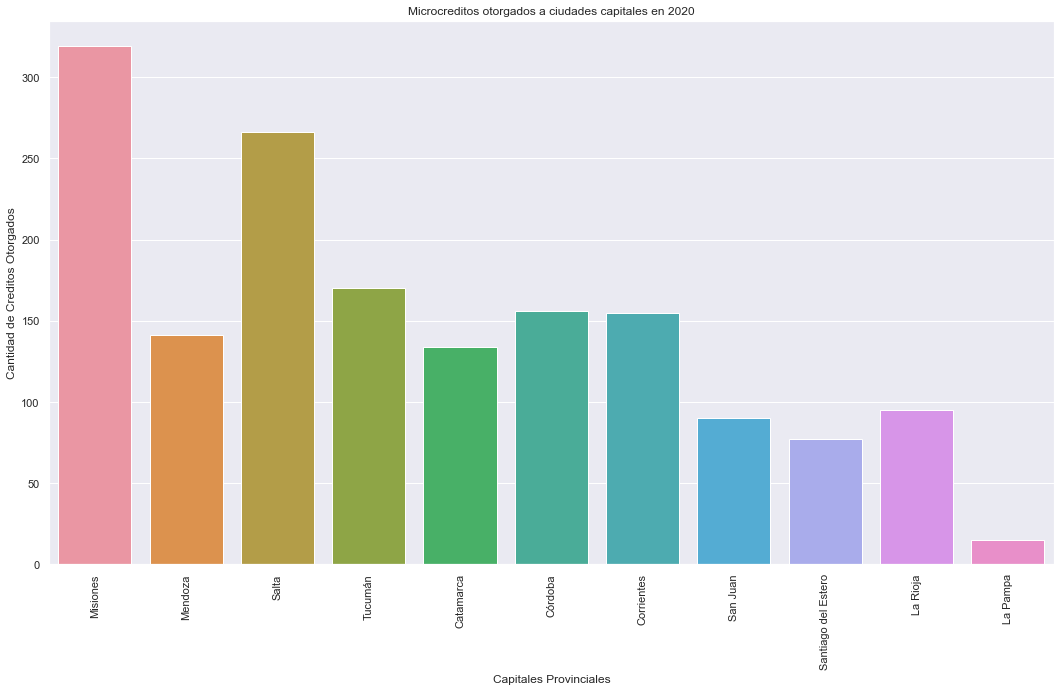

In [107]:
plt.figure(figsize=(18,10))
c = sns.countplot(x="provincia",data=capitales)
label = plt.xticks(rotation=90)
plt.xlabel("Capitales Provinciales")
plt.ylabel("Cantidad de Creditos Otorgados")
plt.title("Microcreditos otorgados a ciudades capitales en 2020")
plt.show()

In [108]:
creditos.describe()

,Unnamed: 0,codigo_indec_provincia,codigo_indec_departamento,microcreditos,monto_microcreditos
count,29730.000000,29730.000000,29730.000000,29730.000000,2.973000e+04
mean,14864.500000,37.108241,37290.384595,22.433401,8.827745e+04
std,8582.456088,28.646608,28517.182334,52.202353,2.959294e+05
min,0.000000,2.000000,2000.000000,1.000000,2.000000e+02
25%,7432.250000,6.000000,6694.750000,4.000000,1.000000e+04
50%,14864.500000,34.000000,34021.000000,9.000000,2.475000e+04
75%,22296.750000,62.000000,62021.000000,20.000000,6.415721e+04
max,29729.000000,94.000000,94014.000000,1087.000000,1.327279e+07


## Buenos aires

In [109]:
# Ahora solo nos quedamos con los datos de Buenos Aires para realizar un posterior analisis
creditos_caba = creditos[creditos["provincia"]=="Buenos Aires"]
creditos_caba 

,Unnamed: 0,periodo,codigo_indec_provincia,provincia,codigo_indec_departamento,departamento,codigo_indec_localidad,localidad,microcreditos,monto_microcreditos
9,9,2005-05-01,6,Buenos Aires,6357,General Pueyrredón,0635711003,Mar del Plata,1,1400.00
10,10,2005-05-01,6,Buenos Aires,6539,Merlo,0653901001,Libertad,1,350.00
31,31,2005-11-01,6,Buenos Aires,6441,La Plata,0644103015,La Plata,1,420.00
47,47,2006-01-01,6,Buenos Aires,6791,Tandil,06791040,María Ignacia,2,1000.00
48,48,2006-01-01,6,Buenos Aires,6560,Moreno,0656001003,La Reja,4,1200.00
...,...,...,...,...,...,...,...,...,...,...
29707,29707,2020-12-01,6,Buenos Aires,6028,Almirante Brown,0602801001,Adrogué,68,3189390.25
29710,29710,2020-12-01,6,Buenos Aires,6274,Florencio Varela,06274010,Florencio Varela,15,662854.00
29712,29712,2020-12-01,6,Buenos Aires,6658,Quilmes,0665801004,Ezpeleta,6,100000.00
29713,29713,2020-12-01,6,Buenos Aires,6798,Tapalqué,06798020,Tapalqué,8,66500.00


In [110]:
creditos_caba.groupby("departamento").describe()

Unnamed: 0                                      \
                            count          mean          std      min   
departamento                                                            
25 de Mayo                   33.0   6485.545455  3468.553671   1630.0   
9 de Julio                   29.0  15308.379310  9050.127144   4672.0   
Adolfo Gonzales Chaves       71.0   8390.126761  6142.867141    240.0   
Almirante Brown             381.0  15218.745407  8477.989217    460.0   
Avellaneda                  126.0  20843.587302  6995.533166   3562.0   
...                           ...           ...          ...      ...   
Tres Lomas                    1.0  17372.000000          NaN  17372.0   
Tres de Febrero             102.0  17788.039216  8080.864478   1752.0   
Vicente López               179.0  19647.564246  7070.970657   2437.0   
Villarino                    45.0   5017.022222  3168.085588    558.0   
Zárate                        5.0  17988.600000  1516.841719  16188.0   

                                                             \
                            25%      50%       75%      max   
departamento                                                  
25 de Mayo               3264.0   6041.0   8887.00  13053.0   
9 de Julio               6987.0  12067.0  26495.00  29624.0   
Adolfo Gonzales Chaves   3378.5   7304.0  13414.00  22801.0   
Almirante Brown          8812.0  14834.0  22633.00  29707.0   
Avellaneda              16514.0  22370.0  26370.75  29705.0   
...                         ...      ...       ...      ...   
Tres Lomas              17372.0  17372.0  17372.00  17372.0   
Tres de Febrero         10385.5  19273.5  24981.75  29414.0   
Vicente López           14103.0  21524.0  25918.50  29055.0   
Villarino                2809.0   4057.0   7401.00  12424.0   
Zárate                  16524.0  18684.0  19150.00  19397.0   

                       codigo_indec_provincia       ... microcreditos         \
                                        count mean  ...           75%    max   
departamento                                        ...                        
25 de Mayo                               33.0  6.0  ...           2.0    7.0   
9 de Julio                               29.0  6.0  ...           7.0   27.0   
Adolfo Gonzales Chaves                   71.0  6.0  ...           9.0   21.0   
Almirante Brown                         381.0  6.0  ...          20.0   93.0   
Avellaneda                              126.0  6.0  ...          17.0   54.0   
...                                       ...  ...  ...           ...    ...   
Tres Lomas                                1.0  6.0  ...           1.0    1.0   
Tres de Febrero                         102.0  6.0  ...          13.0   54.0   
Vicente López                           179.0  6.0  ...          24.5  305.0   
Villarino                                45.0  6.0  ...          11.0   78.0   
Zárate                                    5.0  6.0  ...           8.0   10.0   

                       monto_microcreditos                                \
                                     count           mean            std   
departamento                                                               
25 de Mayo                            33.0    8051.515152    5966.213268   
9 de Julio                            29.0   46998.275862   93310.022317   
Adolfo Gonzales Chaves                71.0   14012.369718   16899.442408   
Almirante Brown                      381.0  101919.330131  251830.420297   
Avellaneda                           126.0   60812.534206   63298.834462   
...                                    ...            ...            ...   
Tres Lomas                             1.0    9000.000000            NaN   
Tres de Febrero                      102.0   44946.960784   56060.532450   
Vicente López                        179.0  115322.839888  248958.849258   
Villarino                             45.0   14022.222222   16282.560231   
Zárate  

In [112]:
creditos_caba["departamento"].value_counts()

La Plata           484
Lomas de Zamora    480
Quilmes            479
Moreno             415
Almirante Brown    381
                  ... 
Roque Pérez          2
Pehuajó              1
Tres Lomas           1
Trenque Lauquen      1
Carlos Casares       1
Name: departamento, Length: 96, dtype: int64

In [113]:
creditos_caba["localidad"].value_counts()

Mar del Plata       158
La Plata            158
San Isidro          152
Florencio Varela    151
Lomas de Zamora     144
                   ... 
Trenque Lauquen       1
Mar del Tuyú          1
Carlos Casares        1
Tres Lomas            1
Magdala               1
Name: localidad, Length: 206, dtype: int64

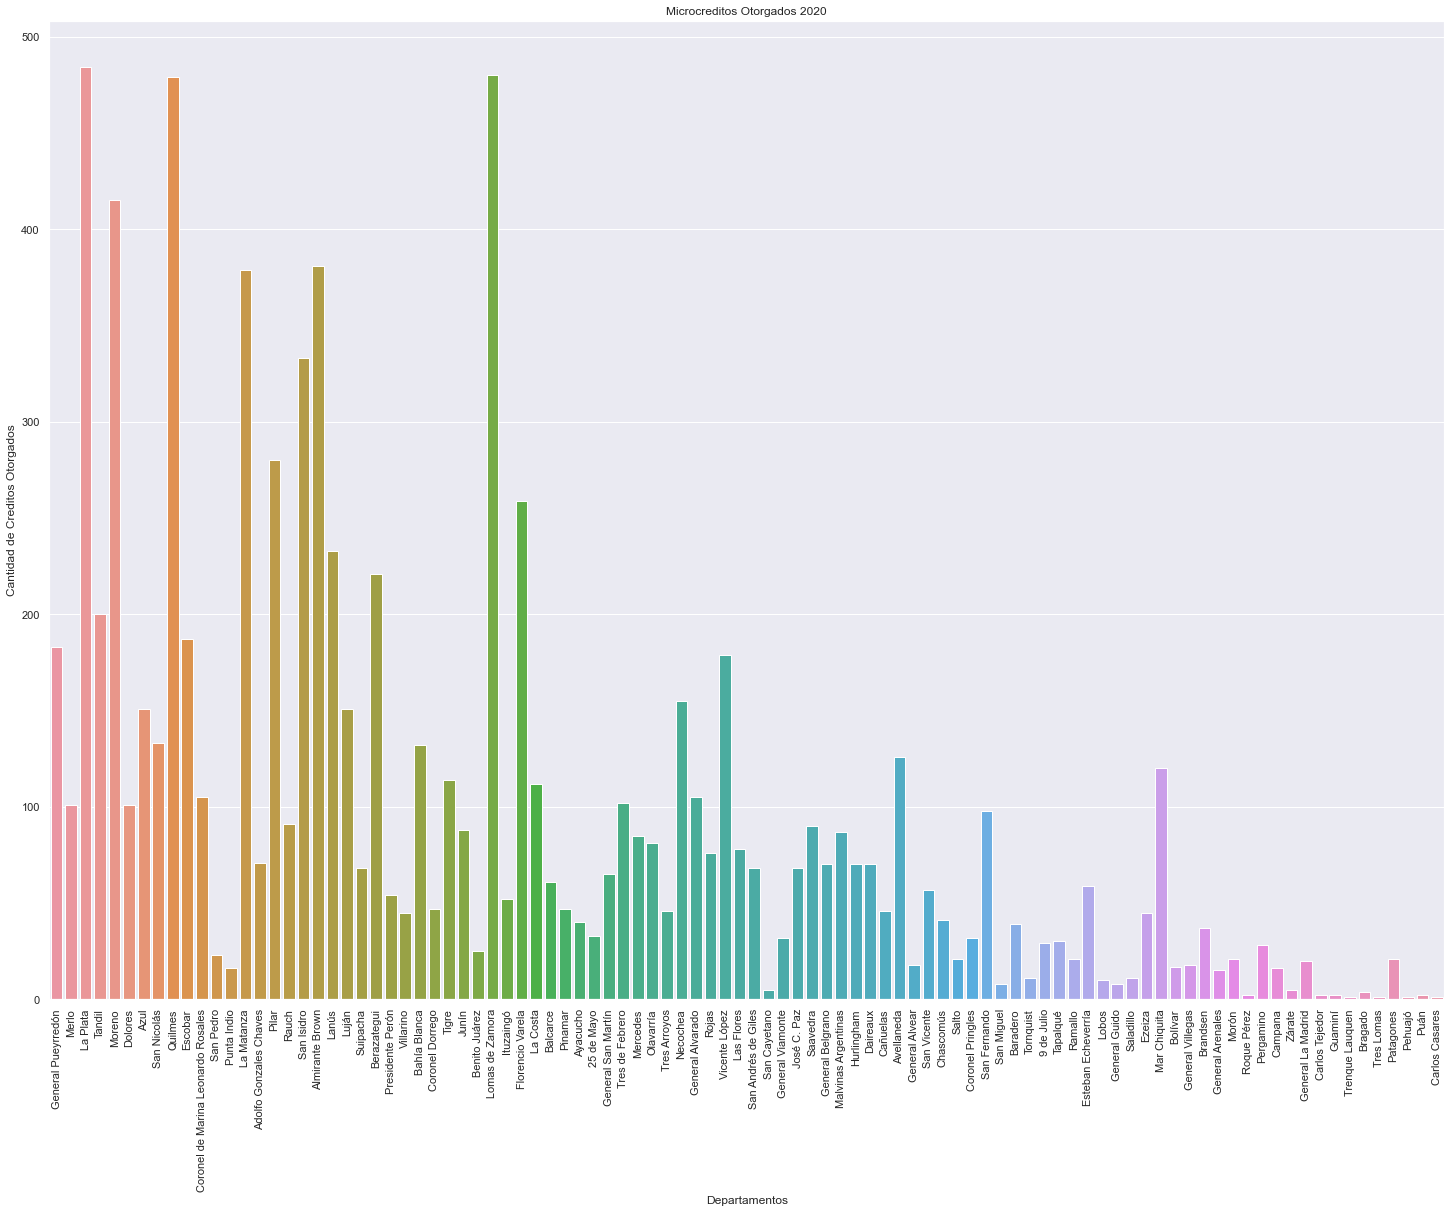

In [114]:
plt.figure(figsize=(25,18))
c = sns.countplot(x="departamento",data=creditos_caba)
label = plt.xticks(rotation=90)
plt.xlabel("Departamentos")
plt.ylabel("Cantidad de Creditos Otorgados")
plt.title("Microcreditos Otorgados 2020")
plt.show()

In [115]:
fig = px.scatter(creditos_caba, x=creditos_caba.index, y=creditos_caba["monto_microcreditos"],)
fig.show()

## Entre Ríos

In [116]:
creditos_er = creditos[creditos["provincia"]=="Entre Ríos"]
creditos_er

,Unnamed: 0,periodo,codigo_indec_provincia,provincia,codigo_indec_departamento,departamento,codigo_indec_localidad,localidad,microcreditos,monto_microcreditos
32,32,2005-11-01,30,Entre Ríos,30084,Paraná,30084160,Paraná,5,2000.0
34,34,2005-12-01,30,Entre Ríos,30105,Victoria,30105060,Victoria,6,2700.0
59,59,2006-02-01,30,Entre Ríos,30070,La Paz,30070010,Bovril,1,5000.0
74,74,2006-03-01,30,Entre Ríos,30070,La Paz,30070010,Bovril,2,1000.0
80,80,2006-04-01,30,Entre Ríos,30105,Victoria,30105060,Victoria,2,1000.0
...,...,...,...,...,...,...,...,...,...,...
29493,29493,2020-09-01,30,Entre Ríos,30015,Concordia,3001506005,Concordia,2,25200.0
29540,29540,2020-10-01,30,Entre Ríos,30015,Concordia,3001506005,Concordia,3,35000.0
29651,29651,2020-11-01,30,Entre Ríos,30015,Concordia,3001506005,Concordia,5,70000.0
29695,29695,2020-12-01,30,Entre Ríos,30015,Concordia,3001506005,Concordia,3,40000.0


In [117]:
creditos_er.groupby("departamento").describe()

Unnamed: 0                                                \
                      count          mean          std      min       25%   
departamento                                                                
Colón                  44.0  13893.022727  4475.900058   6784.0  10216.00   
Concordia              63.0  19467.333333  7524.495703   6785.0  13449.00   
Diamante               15.0  15792.200000  4837.099001   6003.0  13793.00   
Federación             42.0  15179.547619  4389.398860   7355.0  11640.25   
Federal                85.0  14856.905882  7689.516044   2807.0   7953.00   
Feliciano              58.0  10407.224138  5582.462941   2051.0   5793.25   
Gualeguay              14.0  20101.500000  4301.843518  13000.0  15991.75   
Gualeguaychú          167.0  16029.299401  7885.521815   1593.0   9330.00   
Islas del Ibicuy       13.0  16346.307692  2142.351293  13299.0  14899.00   
La Paz                152.0  12922.855263  7847.113959     59.0   6790.75   
Nogoyá                 37.0  21739.945946  4069.146238  13017.0  19539.00   
Paraná                345.0  15102.455072  7790.421118     32.0   8260.00   
San Salvador           11.0  18143.545455  2575.393732  14137.0  16011.00   
Tala                   56.0  15474.071429  6458.774640   3594.0  10818.25   
Uruguay                66.0  13578.015152  7429.030641   1814.0   7227.75   
Victoria              130.0  14408.461538  9665.004196     34.0   5275.75   
Villaguay              75.0  14539.466667  6802.742715   3412.0   8665.50   

                                             codigo_indec_provincia        \
                      50%       75%      max                  count  mean   
departamento                                                                
Colón             13762.0  17408.75  21929.0                   44.0  30.0   
Concordia         18891.0  28225.50  29695.0                   63.0  30.0   
Diamante          16813.0  18892.50  21883.0                   15.0  30.0   
Federación        15386.0  18595.50  23597.0                   42.0  30.0   
Federal           14578.0  21507.00  29042.0                   85.0  30.0   
Feliciano          9873.5  14168.50  21827.0                   58.0  30.0   
Gualeguay         21195.5  22321.00  25846.0                   14.0  30.0   
Gualeguaychú      17357.0  22836.50  29041.0                  167.0  30.0   
Islas del Ibicuy  16177.0  17877.00  21099.0                   13.0  30.0   
La Paz            11496.0  20873.25  26756.0                  152.0  30.0   
Nogoyá            22219.0  24867.00  27332.0                   37.0  30.0   
Paraná            15219.0  21511.00  28955.0                  345.0  30.0   
San Salvador      18149.0  20349.50  21304.0                   11.0  30.0   
Tala              16303.5  20126.50  27073.0                   56.0  30.0   
Uruguay           13173.5  19695.25  28641.0                   66.0  30.0   
Victoria          15019.0  22926.50  29711.0                  130.0  30.0   
Villaguay         14785.0  19874.50  28163.0                   75.0  30.0   

                  ... microcreditos        monto_microcreditos                \
                  ...           75%    max               count          mean   
departamento      ...                                                          
Colón             ...         17.00   48.0                44.0  29580.113636   
Concordia         ...         21.50  112.0                63.0  79406.326349   
Diamante          ...         13.00   62.0                15.0  32326.666667   
Federación        ...         17.50   59.0                42.0  38117.214286   
Federal           ...         13.00   73.0                85.0  29472.082353   
Feliciano         ...          8.00   56.0                58.0  28048.362069   
Gualeguay         ...         48.00   73.0                14.0  79928.571429   
Gualeguaychú      ...         31.00  105.0               167.0  55689.383413   
Islas del Ibicuy  ...         13.00   18.0             

In [118]:
creditos_er.groupby("localidad").describe()

Unnamed: 0                                      \
                              count          mean          std      min   
localidad                                                                 
Bovril                         37.0  10477.081081  7982.762813     59.0   
Ceibas                          1.0  21099.000000          NaN  21099.0   
Chajarí                        19.0  17633.210526  2955.088823  13004.0   
Concepción del Uruguay         66.0  13578.015152  7429.030641   1814.0   
Concordia                      63.0  19467.333333  7524.495703   6785.0   
Crespo                         88.0  16036.022727  8736.261075    427.0   
Diamante                       13.0  17277.230769  3061.995024  12677.0   
Federal                        73.0  15774.205479  7869.663412   2807.0   
General Campos                  4.0  15262.500000   926.726677  14137.0   
General Ramírez                 2.0   6139.500000   193.040151   6003.0   
Gualeguay                      14.0  20101.500000  4301.843518  13000.0   
Gualeguaychú                  124.0  15815.645161  8570.718897   1593.0   
Hernandarias                   39.0  10777.512821  5629.449818    373.0   
Ibicuy                         12.0  15950.250000  1668.031073  13299.0   
La Paz                         73.0  14530.315068  8554.643721    923.0   
Larroque                       43.0  16645.418605  5487.864891   6516.0   
María Grande                   12.0  14058.083333  5452.782767   7677.0   
Nogoyá                         37.0  21739.945946  4069.146238  13017.0   
Paraná                        128.0  16132.437500  8856.705627     32.0   
Piedras Blancas                27.0  11850.481481  5128.829461   4489.0   
Pueblo Brugo                   17.0  11750.705882  3572.863903   6284.0   
Rosario del Tala               56.0  15474.071429  6458.774640   3594.0   
San Jaime de la Frontera       23.0  13152.608696  4389.398248   7355.0   
San José                       25.0  16103.640000  4236.199898   7956.0   
San José de Feliciano          58.0  10407.224138  5582.462941   2051.0   
San Salvador                    7.0  19789.857143  1389.002931  17870.0   
Santa Elena                    15.0  13063.066667  6599.515507   5461.0   
Sauce de Luna                  12.0   9276.666667  2569.718355   6513.0   
Seguí                          35.0  13542.885714  5104.410813   6032.0   
Tabossi                        26.0  18132.384615  2714.493206  12689.0   
Victoria                      130.0  14408.461538  9665.004196     34.0   
Villa  Elisa                   19.0  10984.315789  2865.865044   6784.0   
Villaguay                      75.0  14539.466667  6802.742715   3412.0   

                                                                \
                               25%      50%       75%      max   
localidad                                                        
Bovril                     5220.00  10304.0  17351.00  24866.0   
Ceibas                    21099.00  21099.0  21099.00  21099.0   
Chajarí                   15067.00  17597.0  19744.50  23597.0   
Concepción del Uruguay     7227.75  13173.5  19695.25  28641.0   
Concordia                 13449.00  18891.0  28225.50  29695.0   
Crespo                     8717.50  16654.5  24187.00  28955.0   
Diamante                  14905.00  17596.0  19370.00  21883.0   
Federal                    8579.00  16158.0  22269.00  29042.0   
General Campos            14702.50  15371.0  15931.00  16171.0   
General Ramírez            6071.25   6139.5   6207.75   6276.0   
Gualeguay                 15991.75  21195.5  22321.00  25846.0   
Gualeguaychú               7848.50  17222.0  23474.75  29041.0   
Hernandarias               6158.00  11203.0  15064.50  21784.0   
Ibicuy                    14817.75  15857.0  17087.25  18421.0   
La Paz                     6791.00  14246.0  22995.00  26756.0   
Larroque                  11599.00  17599.0  21197.00  24865.0   
María Grande               8952.25  14405.0  17217.00  22217.0   
Nogo

In [119]:
print(f"Maximo de microcredito otorgado: {creditos_er.microcreditos.max()}")
print(f"Maximo monto en  microcredito otorgado: {creditos_er.monto_microcreditos.max()}")

Maximo de microcredito otorgado: 363
Maximo monto en  microcredito otorgado: 1715114.0


In [120]:
creditos_er["departamento"].value_counts()

Paraná              345
Gualeguaychú        167
La Paz              152
Victoria            130
Federal              85
Villaguay            75
Uruguay              66
Concordia            63
Feliciano            58
Tala                 56
Colón                44
Federación           42
Nogoyá               37
Diamante             15
Gualeguay            14
Islas del Ibicuy     13
San Salvador         11
Name: departamento, dtype: int64

In [121]:
creditos_er["localidad"].value_counts()

Victoria                    130
Paraná                      128
Gualeguaychú                124
Crespo                       88
Villaguay                    75
Federal                      73
La Paz                       73
Concepción del Uruguay       66
Concordia                    63
San José de Feliciano        58
Rosario del Tala             56
Larroque                     43
Hernandarias                 39
Nogoyá                       37
Bovril                       37
Seguí                        35
Piedras Blancas              27
Tabossi                      26
San José                     25
San Jaime de la Frontera     23
Chajarí                      19
Villa  Elisa                 19
Pueblo Brugo                 17
Santa Elena                  15
Gualeguay                    14
Diamante                     13
Ibicuy                       12
Sauce de Luna                12
María Grande                 12
San Salvador                  7
General Campos                4
General 

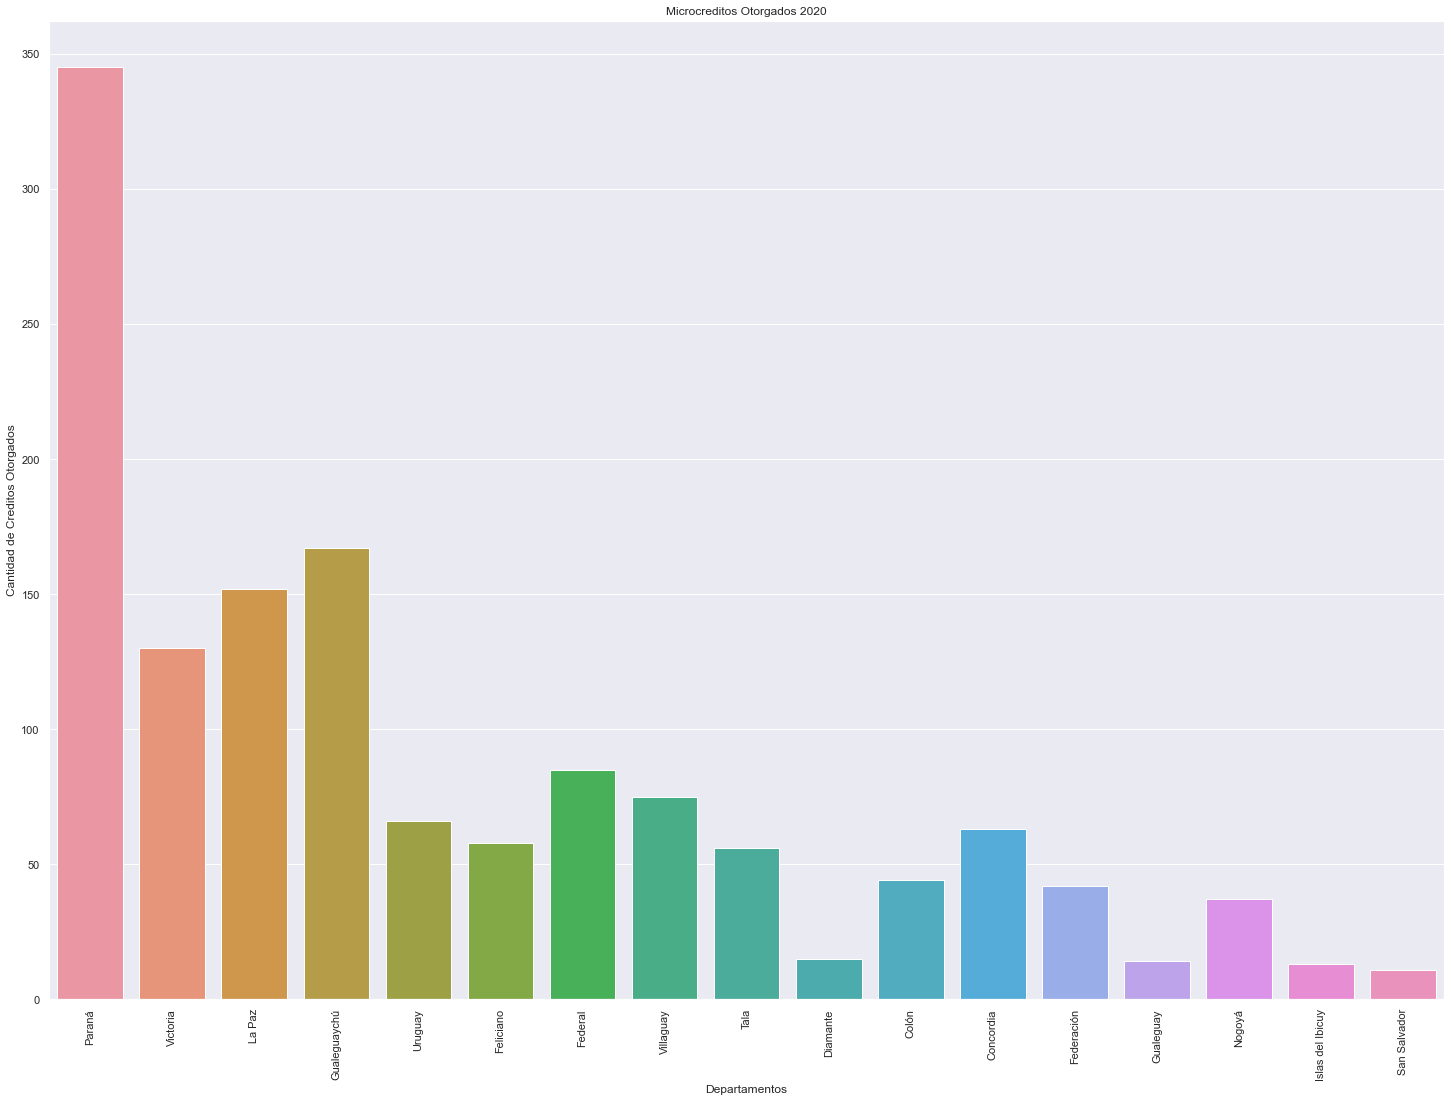

In [122]:
plt.figure(figsize=(25,18))
er = sns.countplot(x="departamento",data=creditos_er)
label = plt.xticks(rotation=90)
plt.xlabel("Departamentos")
plt.ylabel("Cantidad de Creditos Otorgados")
plt.title("Microcreditos Otorgados 2020")
plt.show()

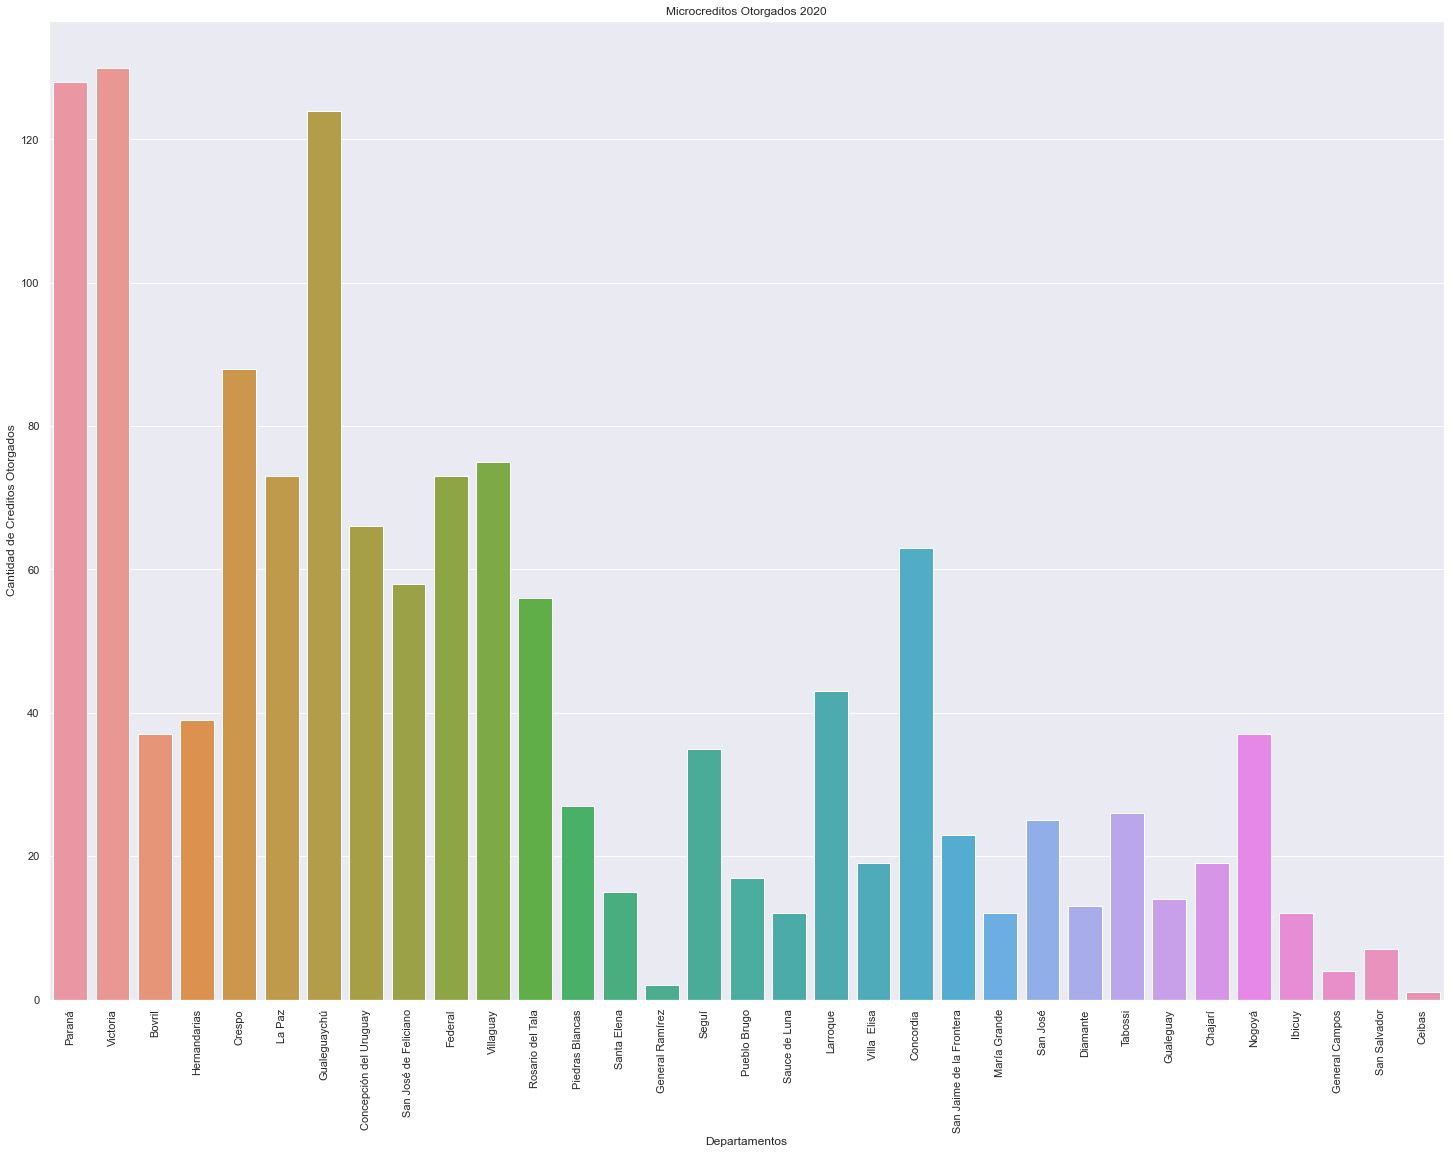

In [123]:
plt.figure(figsize=(25,18))
c = sns.countplot(x="localidad",data=creditos_er)
label = plt.xticks(rotation=90)
plt.xlabel("Departamentos")
plt.ylabel("Cantidad de Creditos Otorgados")
plt.title("Microcreditos Otorgados 2020")
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


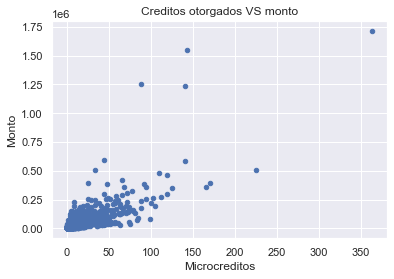

In [124]:
creditos_er.plot(kind="scatter",x="microcreditos",y="monto_microcreditos")
plt.title("Creditos otorgados VS monto")
plt.xlabel("Microcreditos")
plt.ylabel("Monto")
plt.show()

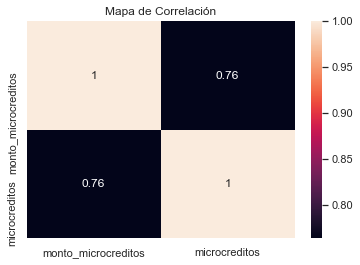

In [125]:
m = creditos_er[["monto_microcreditos","microcreditos"]]
sns.heatmap(m.corr(method = 'pearson'), annot = True)
plt.title("Mapa de Correlación")
plt.show()

## Regiones geograficas de Argentina

In [126]:
creditos_regiones = creditos["provincia"].replace(["Mendoza","San Juan","San Luis"],"Cuyo")
creditos_regiones = creditos_regiones.replace(["Misiones","Corrientes","Chaco","Formosa"],"Noreste")
creditos_regiones = creditos_regiones.replace(["Entre Ríos","Buenos Aires","Santa Fe", "Córdoba","La Pampa"],"Pampeana")
creditos_regiones = creditos_regiones.replace(["Neuquén","Río Negro","Santa Cruz","Chubut","Tierra del Fuego"],"Patagonica")
creditos_regiones = creditos_regiones.replace(["La Rioja","Catamarca","Tucumán","Salta","Jujuy","Santiago del Estero"],"Noroeste")
creditos_regiones = creditos_regiones.replace(["Ciudad de Buenos Aires"],"GBA")

creditos_regiones = pd.DataFrame(creditos_regiones)
creditos_regiones.columns = ["Región"]

creditos_regiones

,Región
0,Cuyo
1,Noreste
2,Noreste
3,Noreste
4,Noreste
...,...
29725,Pampeana
29726,Pampeana
29727,Noroeste
29728,Noreste


In [127]:
# creditos_regiones.columns=["Región"]
# creditos = creditos.loc[~creditos.index.duplicated(keep='first')]
# creditos_regiones = creditos_regiones.loc[~creditos_regiones.index.duplicated(keep='first')]
creditos = pd.concat([creditos, creditos_regiones], axis=1)
# creditos_excel = creditos.to_excel("creditos.xlsx")
creditos

,Unnamed: 0,periodo,codigo_indec_provincia,provincia,codigo_indec_departamento,departamento,codigo_indec_localidad,localidad,microcreditos,monto_microcreditos,Región
0,0,2001-07-01,50,Mendoza,50070,Maipú,50070060,Maipú,1,1000.00,Cuyo
1,1,2004-12-01,34,Formosa,34021,Laishi,34021030,Herradura,7,2100.00,Noreste
2,2,2004-12-01,34,Formosa,34049,Pilcomayo,34049010,Clorinda,46,13800.00,Noreste
3,3,2005-01-01,34,Formosa,34021,Laishi,34021030,Herradura,10,3000.00,Noreste
4,4,2005-01-01,34,Formosa,34049,Pilcomayo,34049010,Clorinda,1,300.00,Noreste
...,...,...,...,...,...,...,...,...,...,...,...
29725,29725,2020-12-01,14,Córdoba,14028,Cruz del Eje,14028200,Villa de Soto,19,331000.00,Pampeana
29726,29726,2020-12-01,14,Córdoba,14014,Capital,1401401003,Córdoba,16,409000.00,Pampeana
29727,29727,2020-12-01,10,Catamarca,10049,Capital,10049030,San Fernando del Valle de Catamarca,36,519000.00,Noroeste
29728,29728,2020-12-01,18,Corrientes,18042,Empedrado,18042020,Empedrado,12,208000.00,Noreste


In [128]:
creditos_df = creditos[["provincia","departamento","localidad","Región","microcreditos","monto_microcreditos"]]
creditos_df


,provincia,departamento,localidad,Región,microcreditos,monto_microcreditos
0,Mendoza,Maipú,Maipú,Cuyo,1,1000.00
1,Formosa,Laishi,Herradura,Noreste,7,2100.00
2,Formosa,Pilcomayo,Clorinda,Noreste,46,13800.00
3,Formosa,Laishi,Herradura,Noreste,10,3000.00
4,Formosa,Pilcomayo,Clorinda,Noreste,1,300.00
...,...,...,...,...,...,...
29725,Córdoba,Cruz del Eje,Villa de Soto,Pampeana,19,331000.00
29726,Córdoba,Capital,Córdoba,Pampeana,16,409000.00
29727,Catamarca,Capital,San Fernando del Valle de Catamarca,Noroeste,36,519000.00
29728,Corrientes,Empedrado,Empedrado,Noreste,12,208000.00


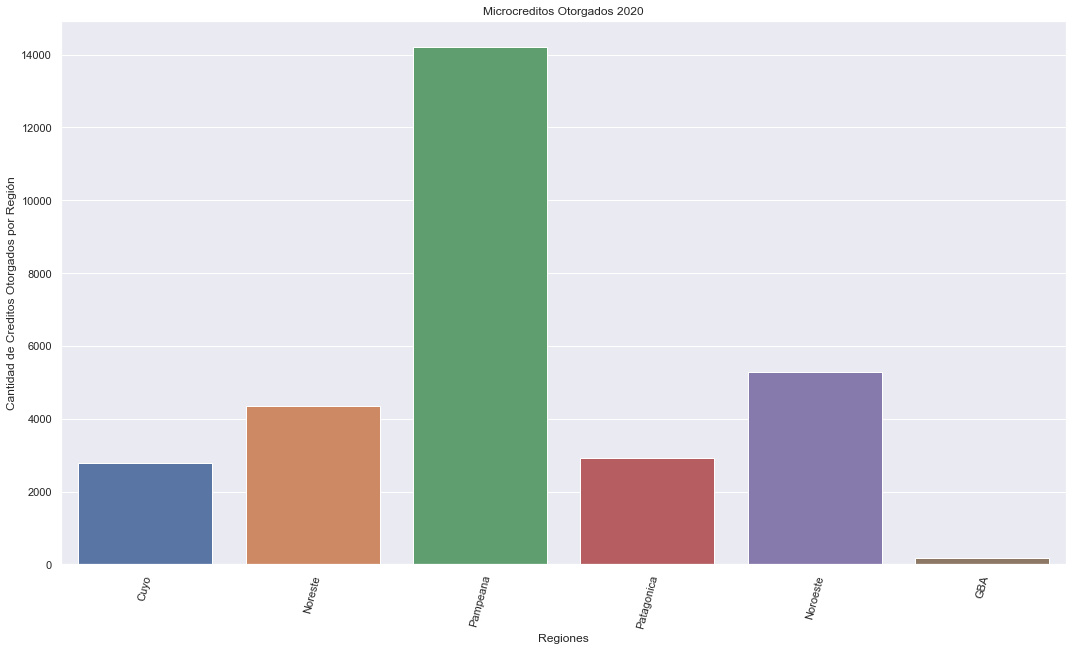

In [129]:
plt.figure(figsize=(18,10))
t = sns.countplot(x="Región",data=creditos_df)
label = plt.xticks(rotation=75)
plt.xlabel("Regiones")
plt.ylabel("Cantidad de Creditos Otorgados por Región")
plt.title("Microcreditos Otorgados 2020")
plt.show()

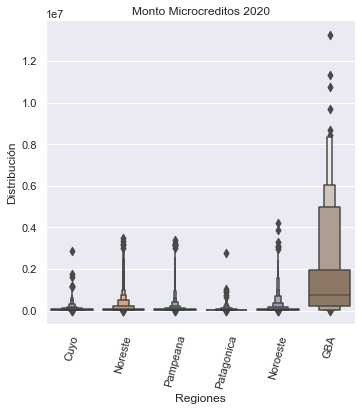

In [130]:
sns.catplot(x="Región", y="monto_microcreditos", kind="boxen", data=creditos_df)
label = plt.xticks(rotation=75)
plt.title("Monto Microcreditos 2020")
plt.ylabel("Distribución")
plt.xlabel("Regiones")
plt.show()

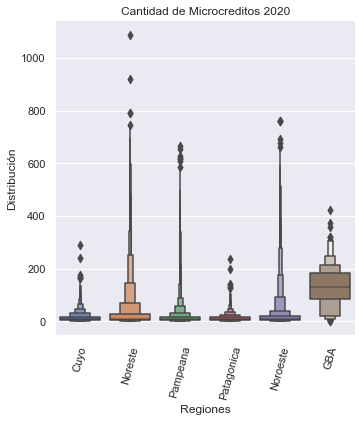

In [131]:
sns.catplot(x="Región", y="microcreditos", kind="boxen", data=creditos_df)
label = plt.xticks(rotation=75)
plt.title("Cantidad de Microcreditos 2020")
plt.ylabel("Distribución")
plt.xlabel("Regiones")
plt.show()

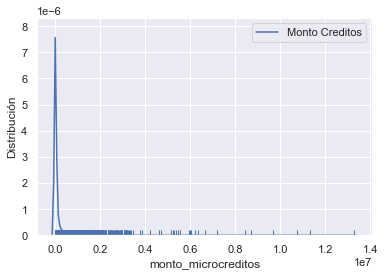

In [132]:
sns.distplot(creditos_df.monto_microcreditos, hist = False, rug = True, label= "Monto Creditos")
plt.ylabel("Distribución")
plt.legend()
plt.show()

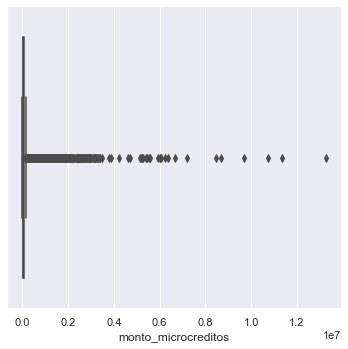

In [133]:
sns.catplot(x="monto_microcreditos", kind="box", data=creditos_df)

In [134]:
creditos_df["monto_microcreditos"].describe()

count    2.973000e+04
mean     8.827745e+04
std      2.959294e+05
min      2.000000e+02
25%      1.000000e+04
50%      2.475000e+04
75%      6.415721e+04
max      1.327279e+07
Name: monto_microcreditos, dtype: float64

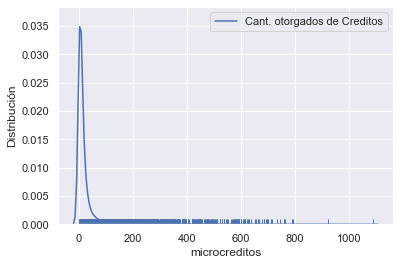

In [135]:
sns.distplot(creditos_df.microcreditos, hist = False, rug = True, label= "Cant. otorgados de Creditos")
plt.ylabel("Distribución")
plt.legend()
plt.show()

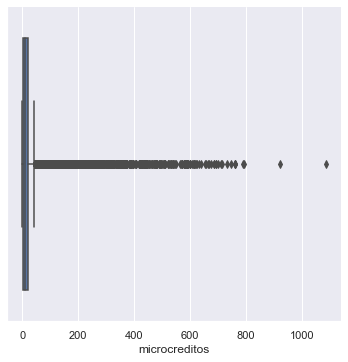

In [136]:
sns.catplot(x="microcreditos", kind="box", data=creditos_df)

In [137]:
creditos_df["microcreditos"].describe()

count    29730.000000
mean        22.433401
std         52.202353
min          1.000000
25%          4.000000
50%          9.000000
75%         20.000000
max       1087.000000
Name: microcreditos, dtype: float64

In [138]:
media = creditos_df.mean()
desvio = creditos_df.std()
ds_max = media +2*desvio
print(creditos_df.min())
print(ds_max)

provincia               Buenos Aires
departamento           12 de Octubre
localidad                 25 de Mayo
Región                          Cuyo
microcreditos                      1
monto_microcreditos            200.0
dtype: object
microcreditos             126.838106
monto_microcreditos    680136.223961
dtype: float64


In [139]:
creditos_df = creditos_df[creditos_df.monto_microcreditos <= 680136.223961]
creditos_df = creditos_df[creditos_df.microcreditos >= 126.838106]
df = pd.DataFrame(creditos_df)
df

,provincia,departamento,localidad,Región,microcreditos,monto_microcreditos
658,Formosa,Pilcomayo,Clorinda,Noreste,141,79200.00
688,Misiones,Capital,Posadas,Noreste,225,118750.00
690,Formosa,Pilcomayo,Clorinda,Noreste,161,92500.00
730,Buenos Aires,Quilmes,San Francisco Solano,Pampeana,135,142100.00
815,Misiones,Capital,Posadas,Noreste,190,94800.00
...,...,...,...,...,...,...
23929,Salta,Capital,Salta,Noroeste,134,675986.00
23969,Tucumán,Capital,San Miguel de Tucumán,Noroeste,132,602600.00
24408,Buenos Aires,San Isidro,Martínez,Pampeana,166,414500.00
24502,Salta,Capital,Salta,Noroeste,128,664907.00


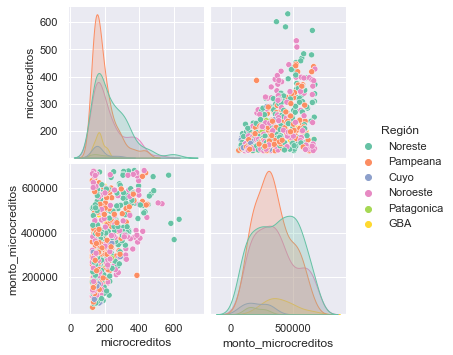

In [140]:
g = sns.pairplot(df, hue="Región", palette="Set2", diag_kind="kde", height=2.5)

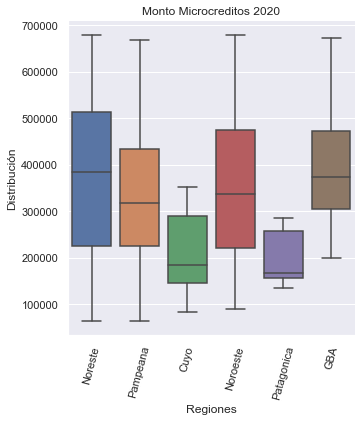

In [141]:
sns.catplot(x="Región", y="monto_microcreditos", kind="box", data=df)
label = plt.xticks(rotation=75)
plt.title("Monto Microcreditos 2020")
plt.ylabel("Distribución")
plt.xlabel("Regiones")
plt.show()

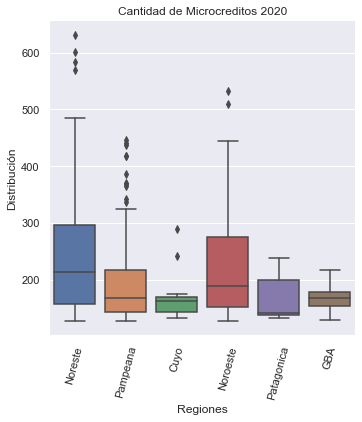

In [142]:
sns.catplot(x="Región", y="microcreditos", kind="box", data=df)
label = plt.xticks(rotation=75)
plt.title("Cantidad de Microcreditos 2020")
plt.ylabel("Distribución")
plt.xlabel("Regiones")
plt.show()

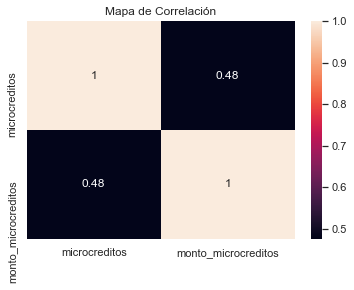

In [143]:
sns.heatmap(df.corr(method = 'pearson'), annot = True)
plt.title("Mapa de Correlación")
plt.show()

In [144]:
import plotly.express as px
fig = px.scatter(df, x="microcreditos", y="monto_microcreditos", color="Región",
hover_name="Región", log_x=True, size_max=60)
fig.show()

# Clustering
* Usamos los metodos K-Means y Gaussian Mixture model (GMM)

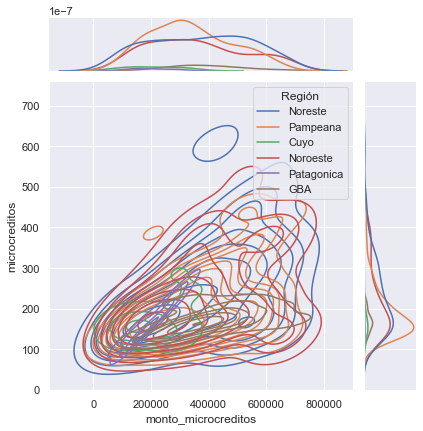

In [145]:
sns.jointplot(data=df,x="monto_microcreditos", y="microcreditos",hue="Región",kind="kde")

In [146]:
# Problemas de Regresión
# Sin Ouliers : Distancia Euclidea y Correlación de Pearson
# Con Ouliers : Distancia Manhattan y Correlación Jackknife (Pearson aumentado)

# Problemas de Clasificación
# Indice Jaccard y Simple Matching Coefficient

# Escalado de datos: 
# recomiendan escalar los datos antes de meterlos a trabajar en un clustering. Por convención, el tipo de escala es el
# Z-Score.

### Clustering Provincial
Usamos el Dataset original, probamos para el clustering manteniendo fijo las variables "monto_microcreditos" y "microcreditos". Entonces en primer lugar vamos a clasificar por provincia; por departamento; y finalmente, por región.
En este sentido, vamos a escalar los datos que por convención se usa un Z-Score. 
* Sin escalar: creditos_df
* Escalados: df

### Escalado. Localidad. 

In [147]:
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
import warnings
warnings.filterwarnings('ignore')

### Clustering Regional

In [148]:
# Seleccionamos las variables que utilizaremos para el clustering. A continuación le hacemos unas modificaciones.
regiones =  df[["Región","microcreditos","monto_microcreditos"]]
regiones = regiones.set_index("Región")

# Escalamos los datos.
reg_scaled = StandardScaler()
reg_scaled = pd.DataFrame(reg_scaled.fit_transform(regiones), columns=regiones.columns, index=regiones.index)

# Visualizamos
reg_scaled.head()

,microcreditos,monto_microcreditos
Región,,
Noreste,-0.834527,-1.707690
Noreste,0.112373,-1.460295
Noreste,-0.609074,-1.624495
Pampeana,-0.902162,-1.314235
Noreste,-0.282168,-1.610108


In [149]:
pca_reg = PCA(n_components= 2)

X_reg = reg_scaled[["microcreditos","monto_microcreditos"]]

X_reg = pca_reg.fit_transform(X) 
X_reg.shape

(543, 2)

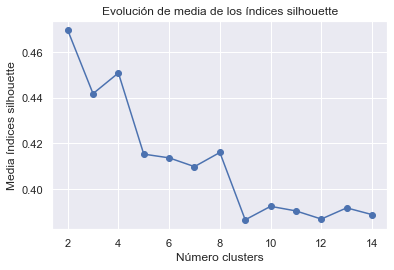

In [165]:
# Método silhouette para identificar el número óptimo de clusters
# ==============================================================================
range_n_clusters = range(2, 15)
valores_medios_silhouette = []

for n_clusters in range_n_clusters:
    modelo_kmeans = KMeans(
                        n_clusters   = n_clusters, 
                        n_init       = 20, 
                        random_state = 123
                    )
    cluster_labels = modelo_kmeans.fit_predict(X_reg)
    silhouette_avg = silhouette_score(X_reg, cluster_labels)
    valores_medios_silhouette.append(silhouette_avg)
    
fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, valores_medios_silhouette, marker='o')
ax.set_title("Evolución de media de los índices silhouette")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Media índices silhouette');


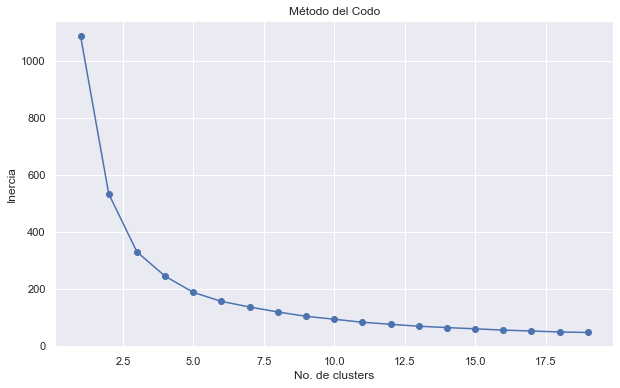

In [150]:
inercia = [] 
for i in range(1, 20):
    algoritmo = KMeans(n_clusters = i, init = 'k-means++', 
                       max_iter = 300, n_init = 10)
    algoritmo.fit(X_reg)
    #Para cada K, se calcula la suma total del cuadrado dentro del clúster
    inercia.append(algoritmo.inertia_)
#Se traza la curva de la suma de errores cuadráticos 
plt.figure(figsize=[10,6])
plt.title('Método del Codo')
plt.xlabel('No. de clusters')
plt.ylabel('Inercia')
plt.plot(list(range(1, 20)), inercia, marker='o')
plt.show()

In [151]:
# Como lo que queremos es saber si los datos se pueden agrupar por región, usaremos 6 cluster para corroborar que los 
# datos se agrupen correctamente
kmeans_reg = KMeans(n_clusters=6, random_state=6)
train_kmeans_reg = kmeans_reg.fit(X_reg)

# Etiquetamos los labels para poder luego graficar.
etiquetas_reg = kmeans_reg.labels_
centros_reg = kmeans_reg.cluster_centers_
print(etiquetas_reg.shape , centros_reg.shape)

(543,) (6, 2)


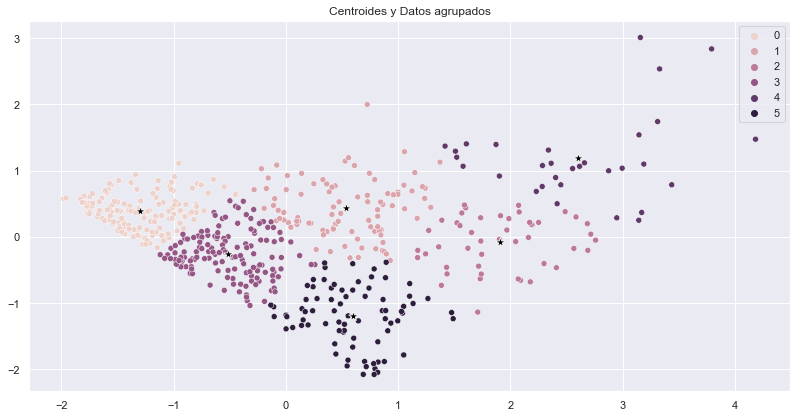

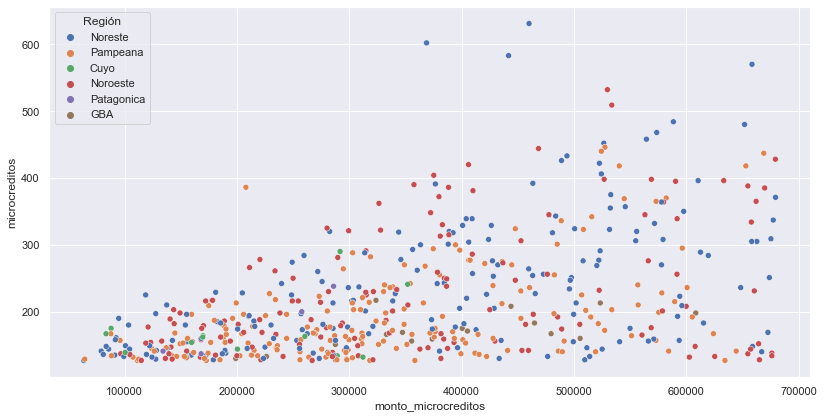

In [153]:
# Momento de graficar
# Aca se grafica por un lado la clusterizacion y por el otro un scatter donde se utiliza el "hue" para corroborar que el 
# modelo haya segmentado bien nuestros datos.

fig = plt.figure(figsize=(30,15))
plt.subplot(2,2,1)

sns.scatterplot(X_reg[:,0],X_reg[:,1], hue = etiquetas_reg)
sns.scatterplot(centros_reg[:,0],centros_reg[:,1], color='black', marker="*", s=100)
plt.title("Centroides y Datos agrupados")

fig = plt.figure(figsize=(30,15))
plt.subplot(2,2,2)
sns.scatterplot(x = "monto_microcreditos", y = "microcreditos",hue = "Región",data=df)

plt.show()

In [154]:
cluster_reg = kmeans_reg.predict(X_reg)
silhouette_reg =  silhouette_score(X_reg, cluster_reg)

print(f"Para 6 Clusters el silhouette_score es: {silhouette_reg}")

Para 6 Clusters el silhouette_score es: 0.41344031959243593


In [155]:
# Ahora vamos a probar con 5 Cluster
kmeans_reg = KMeans(n_clusters=5, random_state=42)
train_kmeans_reg = kmeans_reg.fit(X_reg)

# Etiquetamos los labels para poder luego graficar.
etiquetas_reg = kmeans_reg.labels_
centros_reg = kmeans_reg.cluster_centers_
print(etiquetas_reg.shape , centros_reg.shape)

(543,) (5, 2)


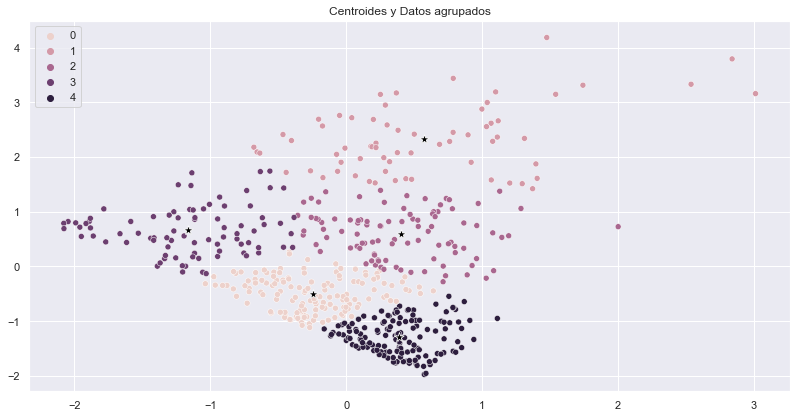

In [156]:
fig = plt.figure(figsize=(30,15))
plt.subplot(2,2,1)

sns.scatterplot(X_reg[:,1], X_reg[:,0], hue = etiquetas_reg)
sns.scatterplot(centros_reg[:, 1], centros_reg[:, 0],color='black', marker="*", s=100)
plt.title("Centroides y Datos agrupados")

plt.show()

In [157]:
cluster_reg = kmeans_reg.predict(X_reg)
silhouette_reg =  silhouette_score(X_reg, cluster_reg)

print(f"Para 5 Clusters el silhouette_score es: {silhouette_reg}")

Para 5 Clusters el silhouette_score es: 0.4151245093128111


### Comparaciones
Finalmente, vamos a ver que datos agrupo nuestros clustering

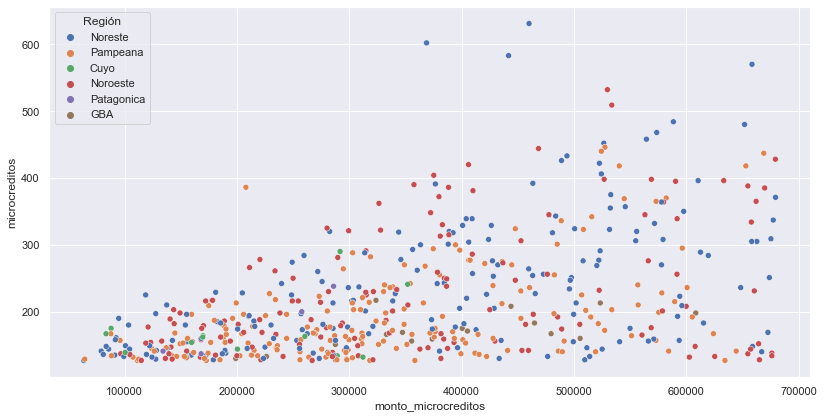

In [166]:
com =  df[["Región","microcreditos","monto_microcreditos","departamento","provincia"]]
com = com.set_index("Región")

fig = plt.figure(figsize=(30,15))
plt.subplot(2,2,2)
sns.scatterplot(x = "monto_microcreditos", y = "microcreditos",hue = com.index,data=com)

plt.show()

In [183]:
# Separamos los 6 posibles Cluster que identifica nuestro modelo (de manera aproximada).
c1 = com[(com["monto_microcreditos"]>500000)|(com["microcreditos"]<=300)]
c2 = com[(com["monto_microcreditos"]>300000)|(com["monto_microcreditos"]<500000)|(com["microcreditos"]<=300)]
c3 = com[(com["monto_microcreditos"]<300000)|(com["monto_microcreditos"]>120)|(com["microcreditos"]<=300)]
c4 = com[(com["monto_microcreditos"]>550000)|(com["microcreditos"]>=300)|(com["microcreditos"]<=400)]
c5 = com[(com["monto_microcreditos"]<550000)|(com["monto_microcreditos"]>300000)|(com["microcreditos"]>=300)|(com["microcreditos"]<=400)]
c6 = com[(com["microcreditos"]>401)]

In [201]:
c3[["departamento","provincia"]]

,departamento,provincia
Región,,
Noreste,Pilcomayo,Formosa
Noreste,Capital,Misiones
Noreste,Pilcomayo,Formosa
Pampeana,Quilmes,Buenos Aires
Noreste,Capital,Misiones
...,...,...
Noroeste,Capital,Salta
Noroeste,Capital,Tucumán
Pampeana,San Isidro,Buenos Aires


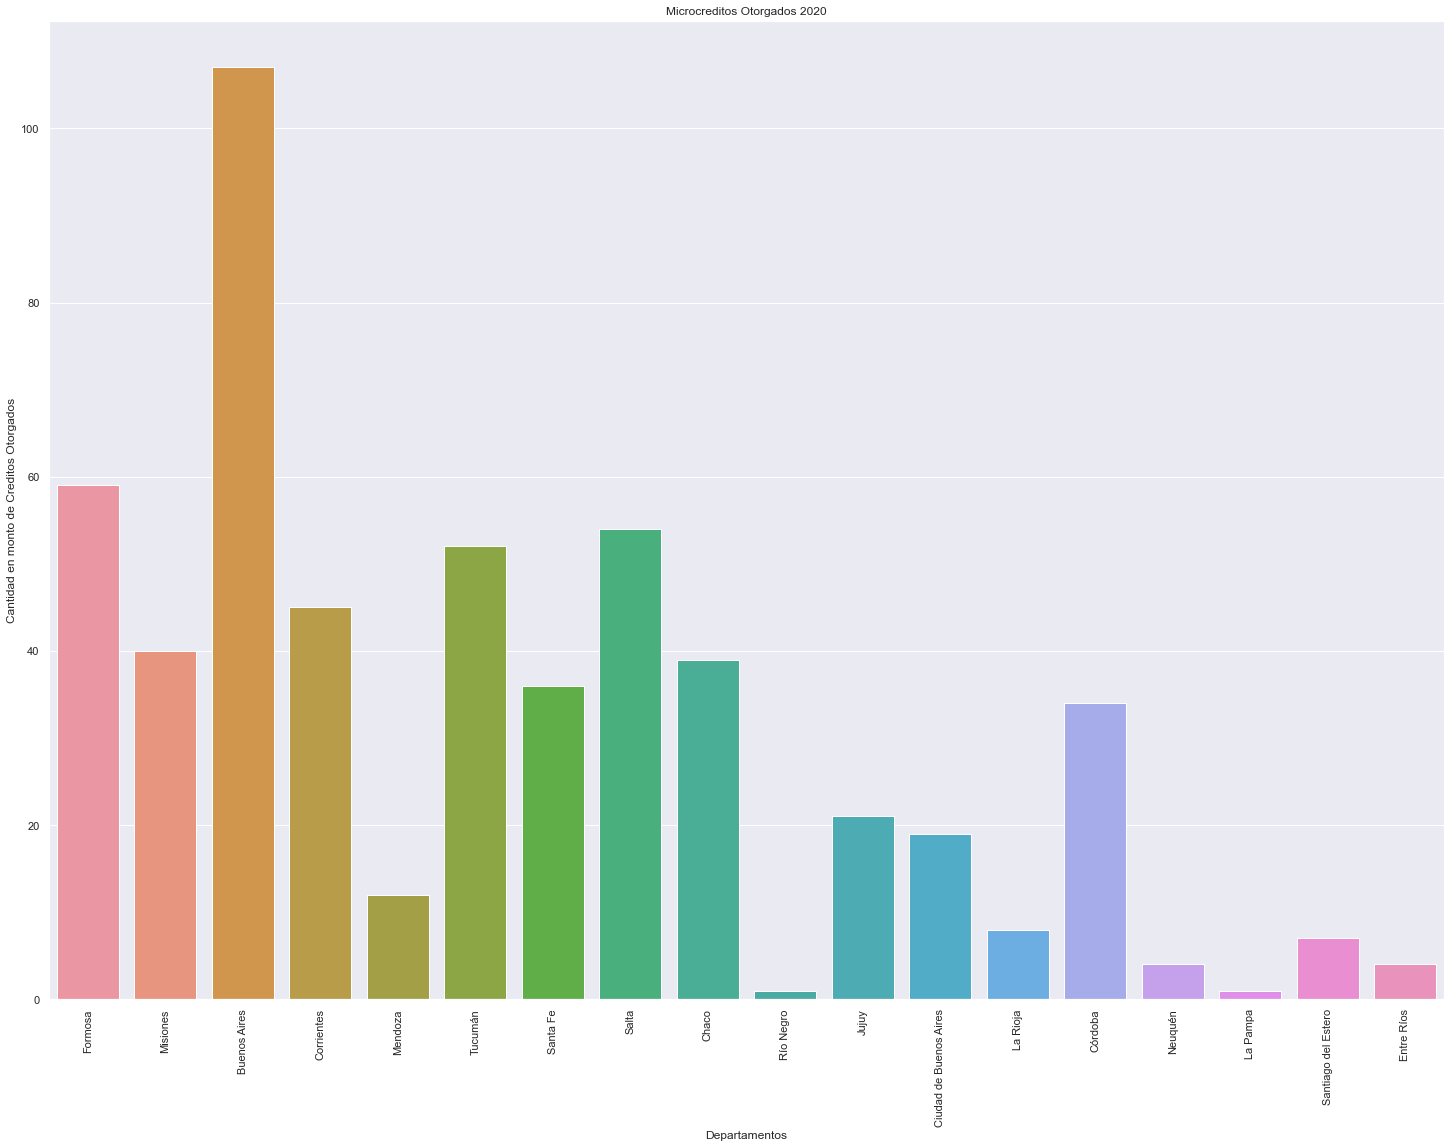

In [198]:
plt.figure(figsize=(25,18))
sns.countplot(x="provincia",data=c3)
label = plt.xticks(rotation=90)
plt.xlabel("Departamentos")
plt.ylabel("Cantidad en monto de Creditos Otorgados")
plt.title("Microcreditos Otorgados 2020")
plt.show()

In [202]:
c2[["departamento","provincia"]]

,departamento,provincia
Región,,
Noreste,Pilcomayo,Formosa
Noreste,Capital,Misiones
Noreste,Pilcomayo,Formosa
Pampeana,Quilmes,Buenos Aires
Noreste,Capital,Misiones
...,...,...
Noroeste,Capital,Salta
Noroeste,Capital,Tucumán
Pampeana,San Isidro,Buenos Aires


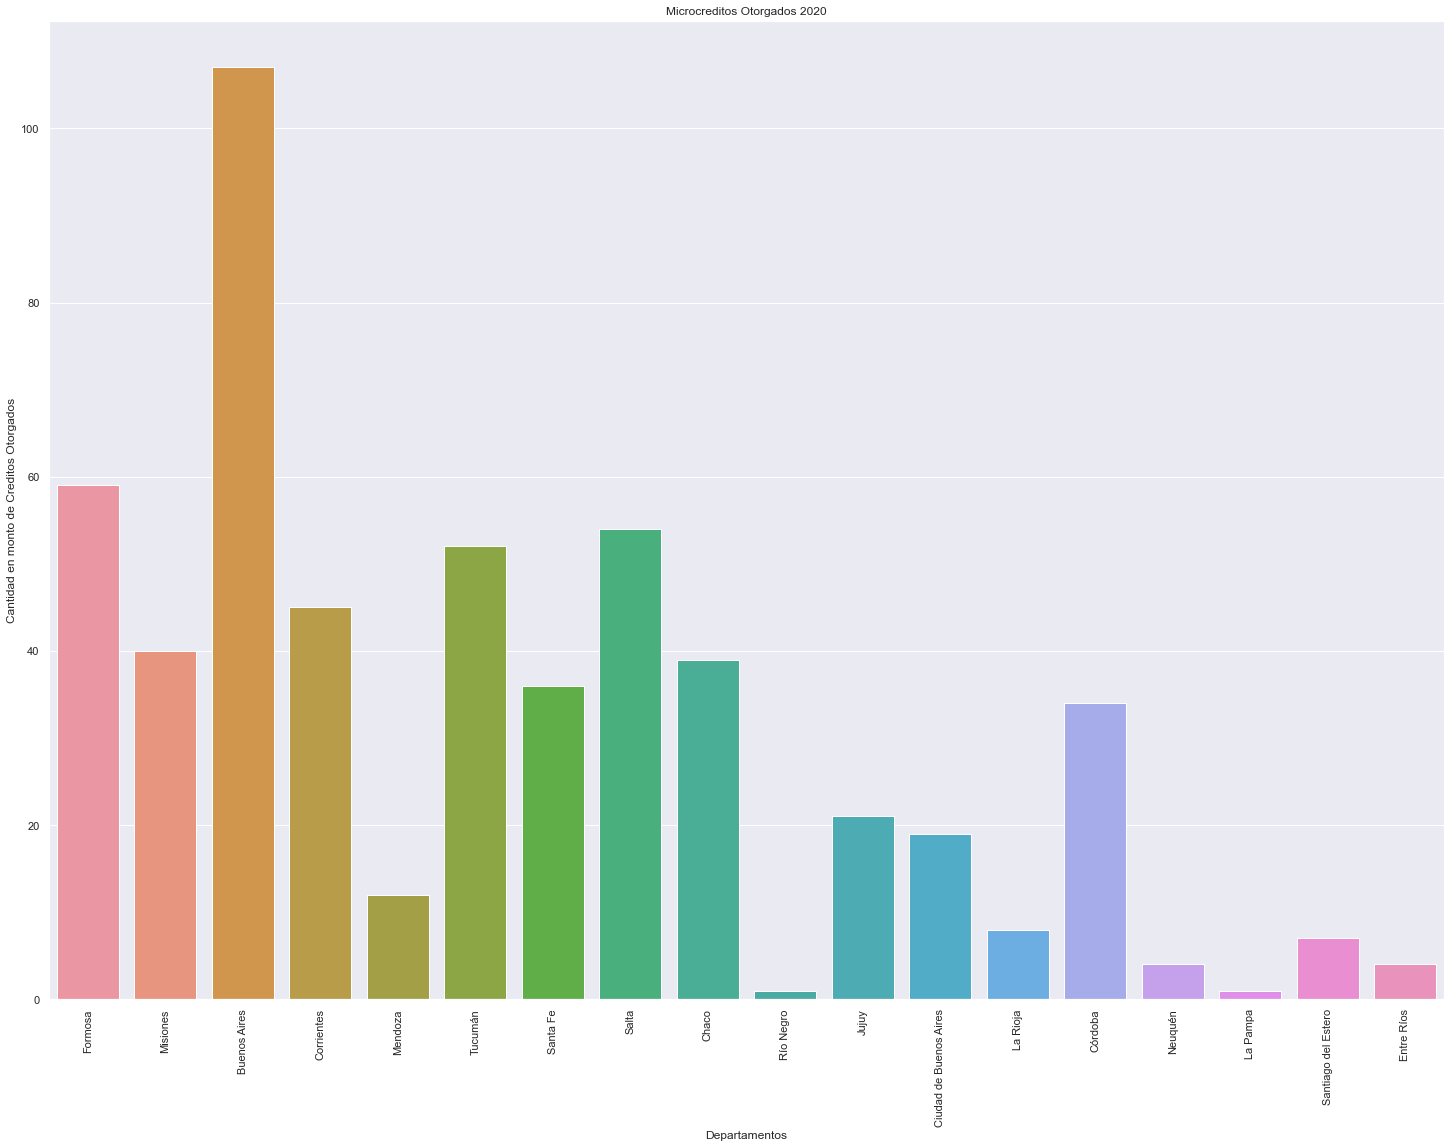

In [203]:
plt.figure(figsize=(25,18))
sns.countplot(x="provincia",data=c2)
label = plt.xticks(rotation=90)
plt.xlabel("Departamentos")
plt.ylabel("Cantidad en monto de Creditos Otorgados")
plt.title("Microcreditos Otorgados 2020")
plt.show()

In [204]:
c1[["departamento","provincia"]]

,departamento,provincia
Región,,
Noreste,Pilcomayo,Formosa
Noreste,Capital,Misiones
Noreste,Pilcomayo,Formosa
Pampeana,Quilmes,Buenos Aires
Noreste,Capital,Misiones
...,...,...
Noroeste,Capital,Salta
Noroeste,Capital,Tucumán
Pampeana,San Isidro,Buenos Aires


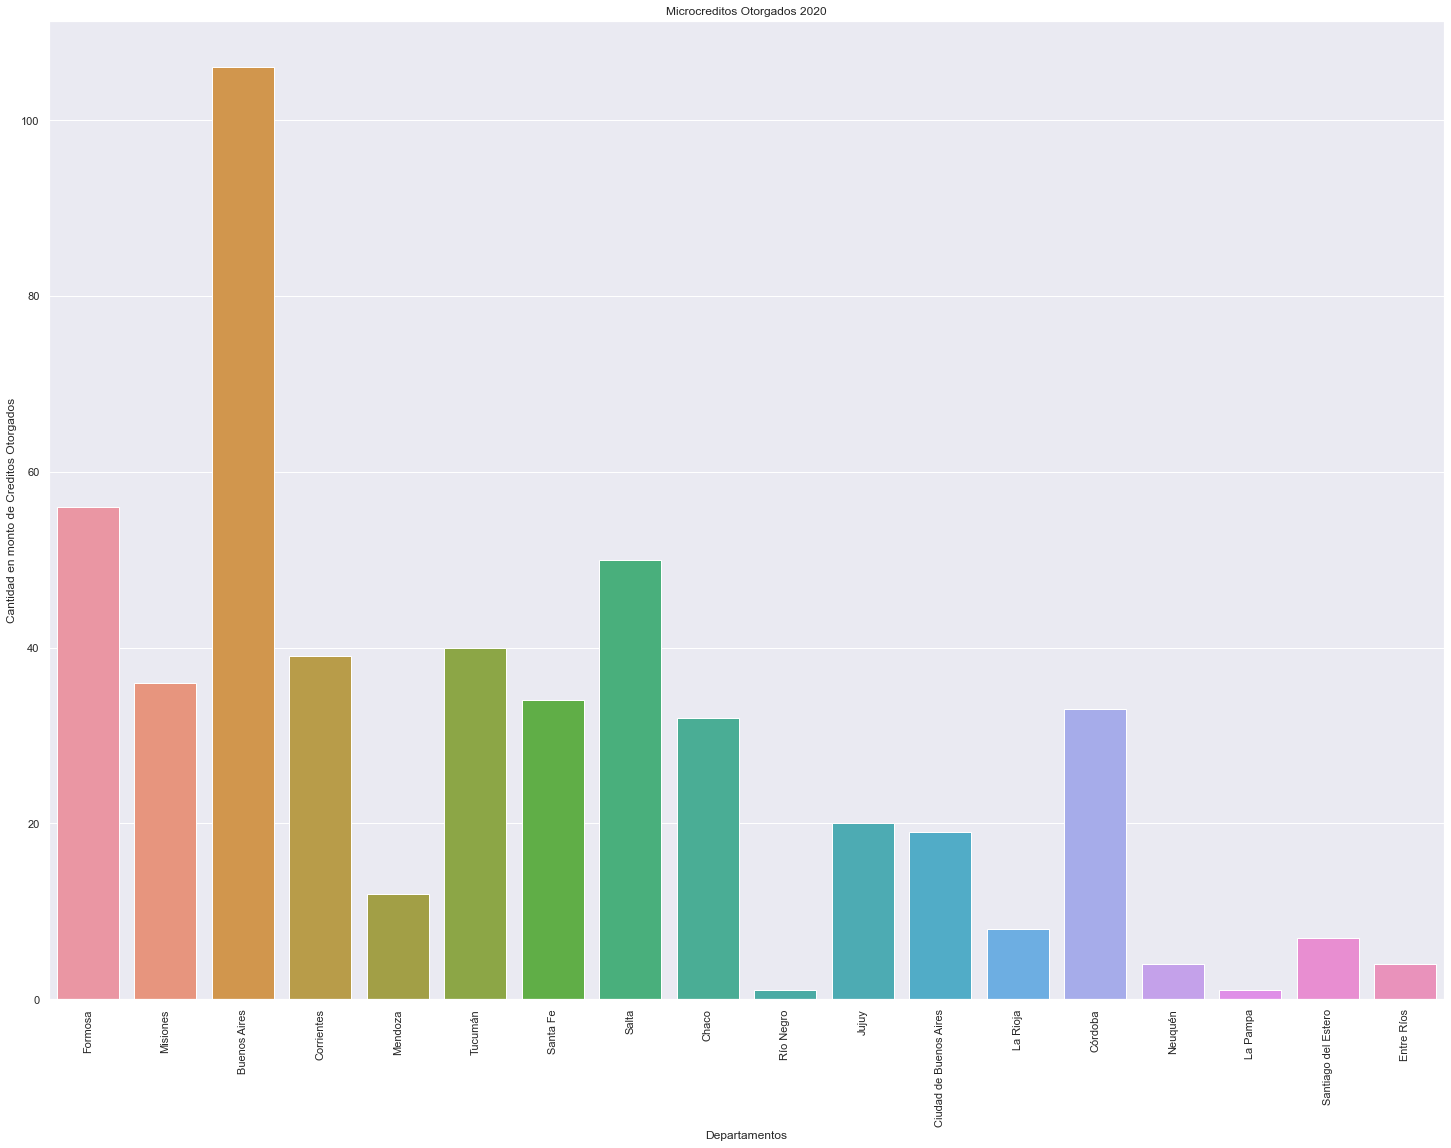

In [205]:
plt.figure(figsize=(25,18))
sns.countplot(x="provincia",data=c1)
label = plt.xticks(rotation=90)
plt.xlabel("Departamentos")
plt.ylabel("Cantidad en monto de Creditos Otorgados")
plt.title("Microcreditos Otorgados 2020")
plt.show()

In [207]:
c4[["departamento","provincia"]]

,departamento,provincia
Región,,
Noreste,Pilcomayo,Formosa
Noreste,Capital,Misiones
Noreste,Pilcomayo,Formosa
Pampeana,Quilmes,Buenos Aires
Noreste,Capital,Misiones
...,...,...
Noroeste,Capital,Salta
Noroeste,Capital,Tucumán
Pampeana,San Isidro,Buenos Aires


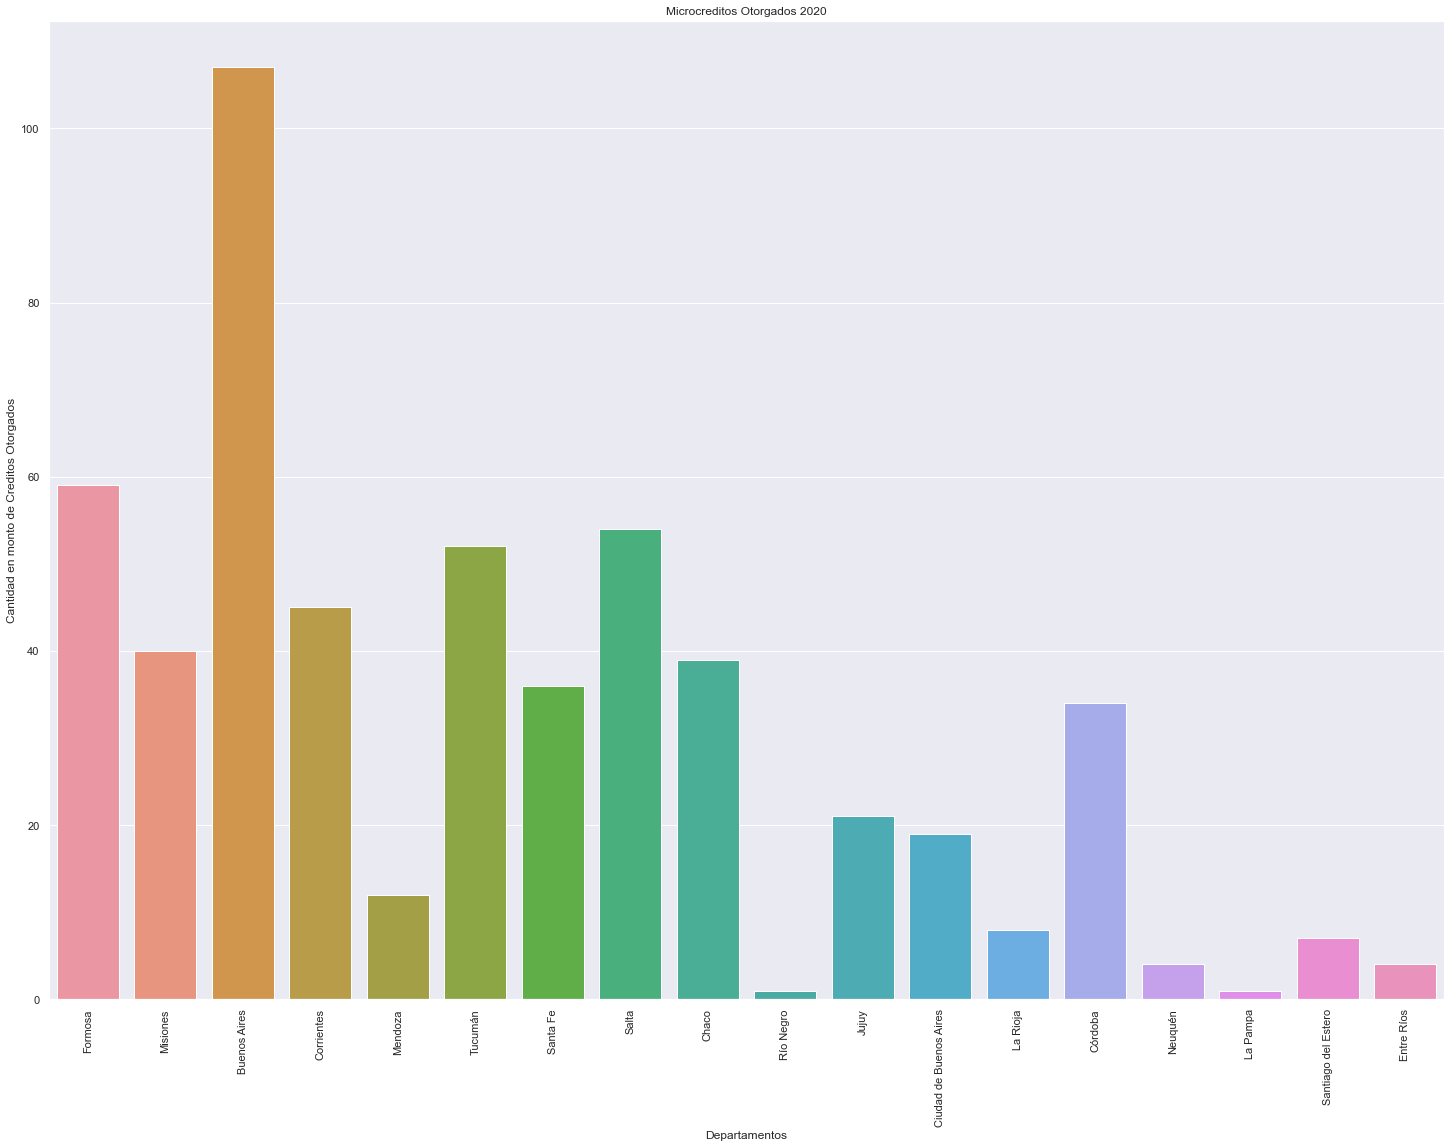

In [208]:
plt.figure(figsize=(25,18))
sns.countplot(x="provincia",data=c4)
label = plt.xticks(rotation=90)
plt.xlabel("Departamentos")
plt.ylabel("Cantidad en monto de Creditos Otorgados")
plt.title("Microcreditos Otorgados 2020")
plt.show()

In [209]:
c5[["departamento","provincia"]]

,departamento,provincia
Región,,
Noreste,Pilcomayo,Formosa
Noreste,Capital,Misiones
Noreste,Pilcomayo,Formosa
Pampeana,Quilmes,Buenos Aires
Noreste,Capital,Misiones
...,...,...
Noroeste,Capital,Salta
Noroeste,Capital,Tucumán
Pampeana,San Isidro,Buenos Aires


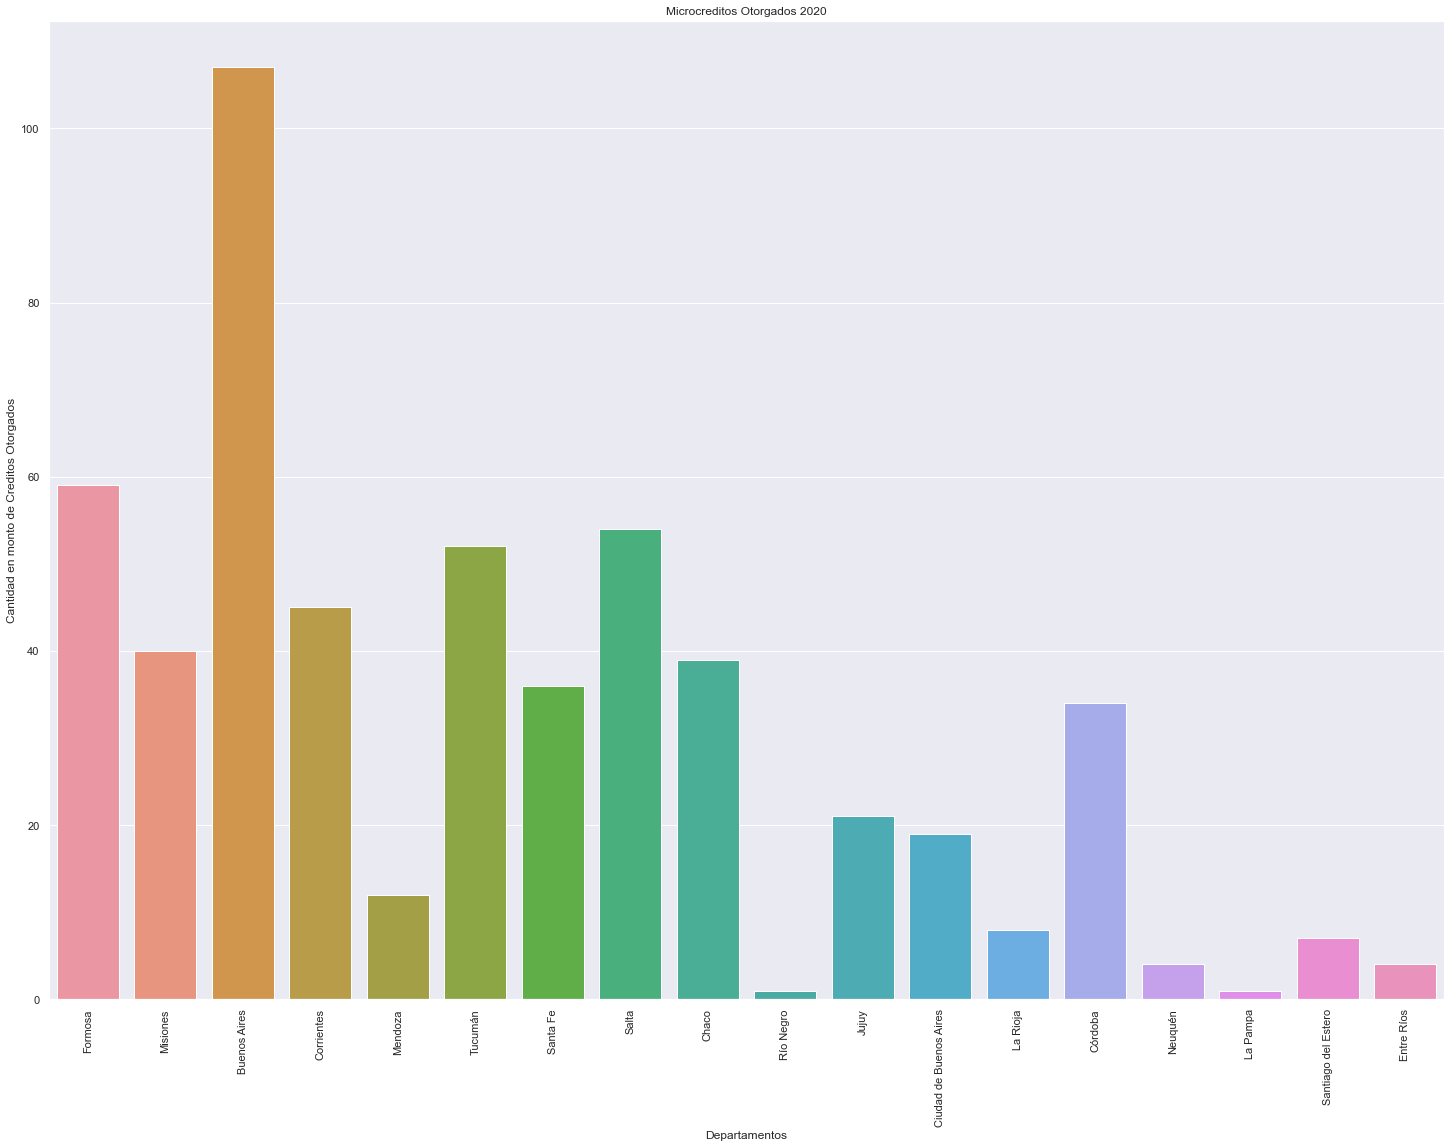

In [210]:
plt.figure(figsize=(25,18))
sns.countplot(x="provincia",data=c5)
label = plt.xticks(rotation=90)
plt.xlabel("Departamentos")
plt.ylabel("Cantidad en monto de Creditos Otorgados")
plt.title("Microcreditos Otorgados 2020")
plt.show()

In [211]:
c6[["departamento","provincia"]]

,departamento,provincia
Región,,
Noroeste,Capital,Tucumán
Noreste,Capital,Misiones
Noroeste,Capital,Tucumán
Noreste,Formosa,Formosa
Noroeste,Capital,Tucumán
Noreste,Capital,Corrientes
Noreste,Capital,Corrientes
Noreste,Capital,Misiones
Noroeste,Capital,Tucumán


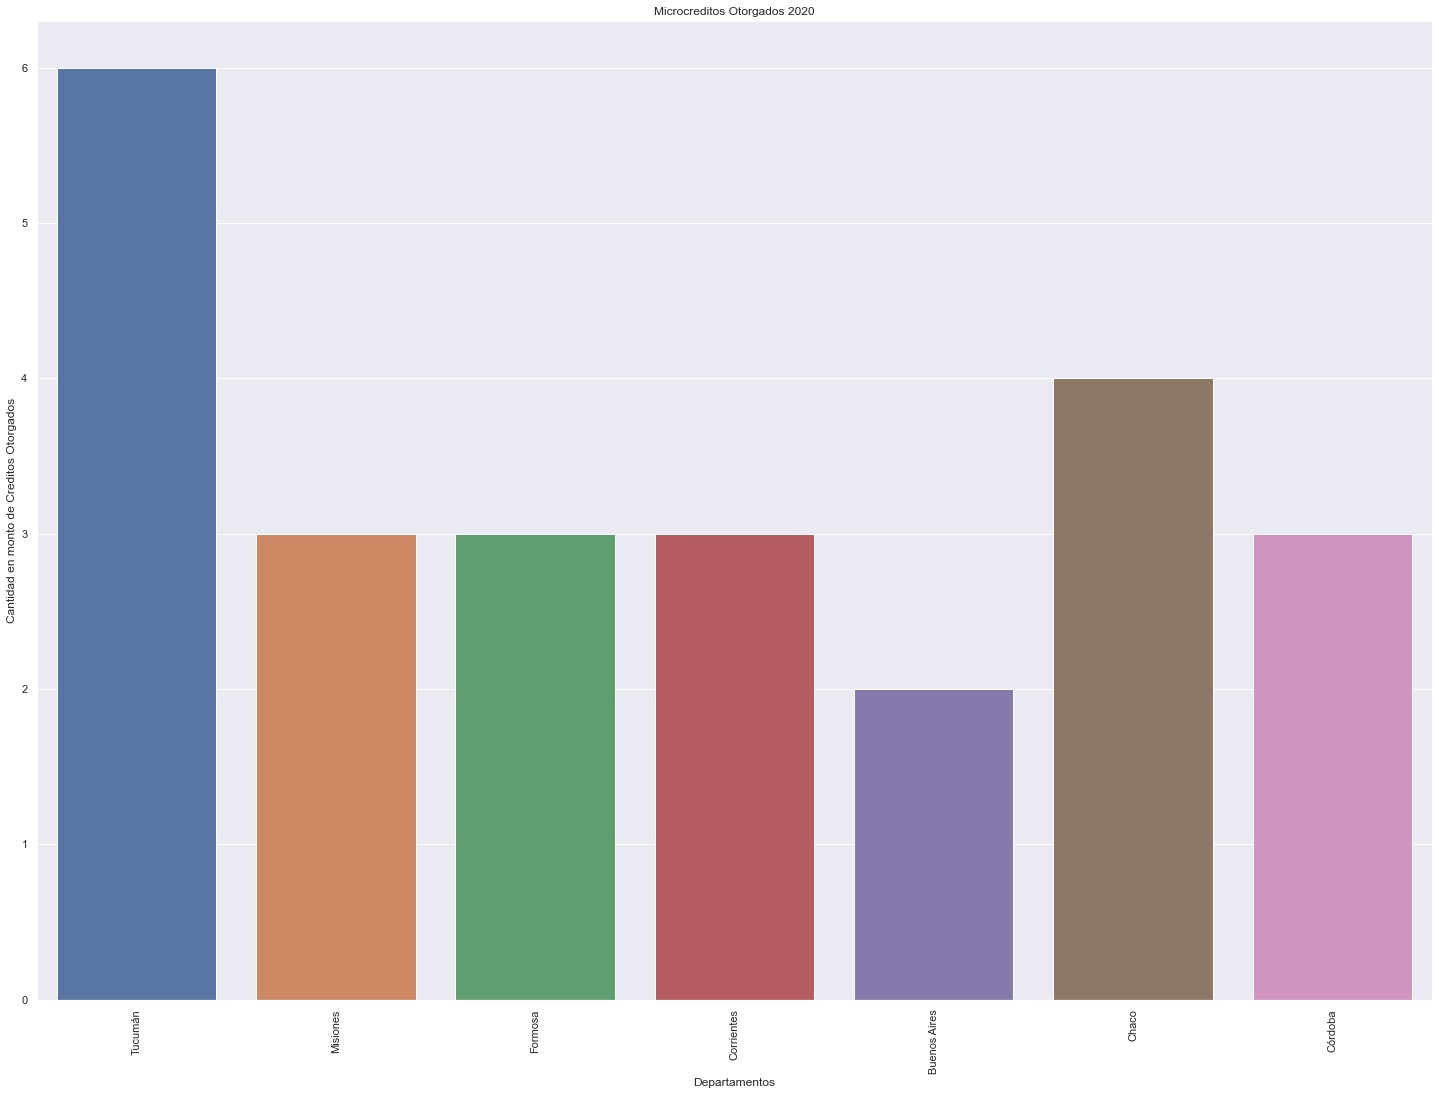

In [212]:
plt.figure(figsize=(25,18))
sns.countplot(x="provincia",data=c6)
label = plt.xticks(rotation=90)
plt.xlabel("Departamentos")
plt.ylabel("Cantidad en monto de Creditos Otorgados")
plt.title("Microcreditos Otorgados 2020")
plt.show()